In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install catboost==1.2.7

  Using cached catboost-1.2.7.tar.gz (71.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [133 lines of output]
        Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
        Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
        Using cached conan-1.66.0.tar.gz (789 kB)
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
        Using cached tornado-6.4.2-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
        Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
        Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
        Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
        Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
   

In [3]:
%pip install catboost

import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor
import warnings

  Using cached catboost-1.2.7.tar.gz (71.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [133 lines of output]
        Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
        Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
        Using cached conan-1.66.0.tar.gz (789 kB)
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached ipython-8.32.0-py3-none-any.whl.metadata (5.0 kB)
        Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
        Using cached tornado-6.4.2-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
        Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
        Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
        Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
       

Import the data from CSV file

In [4]:
df = pd.read_csv('data\stud.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\SAURABH SINGH\AppData\Local\Temp\ipykernel_6820\1894779099.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('data\stud.csv')


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x  =df.drop(columns=['math_score'])

In [6]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
#creating a column transformer with 3 types of transformers
num_featues = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_featues),
    ]
)

In [8]:
x = preprocessor.fit_transform(x)


In [9]:
x.shape

(1000, 151)

In [10]:
#seprate dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 151), (200, 151))

Create and Evaluate Function to give all metrices after model training

In [17]:
def evaluate_model(true,predicted):
    r2_square = r2_score(true,predicted)
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    return mae,rmse,r2_square
    

In [19]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "XGBRegressor":XGBRegressor(),
}
model_list = []
r2_list =[]
for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) #train model

    #make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Evaluate Train and Test data set
    model_train_mae ,model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae ,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance for training set")
    print("-Root mean square error {:.4f}".format(model_train_rmse))
    print("-Mean absolute error {:.4f}".format(model_train_mae))
    print("-R2 score {:.4f}".format(model_train_r2))
      
    print("--------------------------------------")

    print('Model performance for test set')
    print("-Root mean square error {:.4f}".format(model_test_rmse))
    print("-Mean absolute error {:.4f}".format(model_test_mae))
    print("-R2 score {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

LinearRegression
Model performance for training set
-Root mean square error 7.8301
-Mean absolute error 6.2872
-R2 score 0.7280
--------------------------------------
Model performance for test set
-Root mean square error 9.7757
-Mean absolute error 7.9516
-R2 score 0.6073


Ridge
Model performance for training set
-Root mean square error 7.8737
-Mean absolute error 6.3800
-R2 score 0.7250
--------------------------------------
Model performance for test set
-Root mean square error 9.3038
-Mean absolute error 7.6834
-R2 score 0.6443


Lasso
Model performance for training set
-Root mean square error 8.6808
-Mean absolute error 6.9821
-R2 score 0.6658
--------------------------------------
Model performance for test set
-Root mean square error 8.8751
-Mean absolute error 7.3635
-R2 score 0.6763


KNeighborsRegressor
Model performance for training set
-Root mean square error 7.4927
-Mean absolute error 6.0245
-R2 score 0.7510
--------------------------------------
Model performance for te

Results

In [20]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model name','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model name,R2_score
2,Lasso,0.676304
6,AdaBoostRegressor,0.670063
1,Ridge,0.644280
0,LinearRegression,0.607276
3,KNeighborsRegressor,0.592625
5,RandomForestRegressor,0.568433
7,XGBRegressor,0.537276
4,DecisionTreeRegressor,0.427407


Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 60.73


Plot Y_pred and Y-test

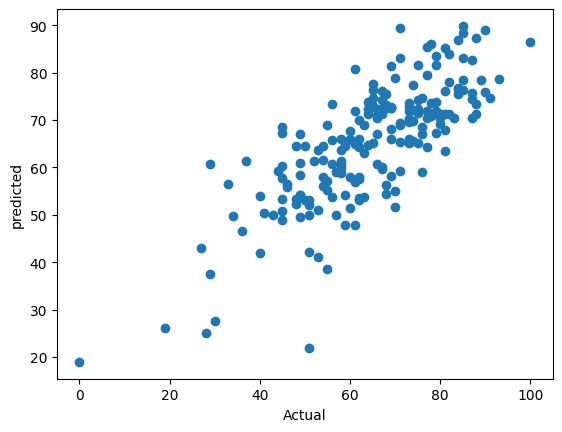

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted');

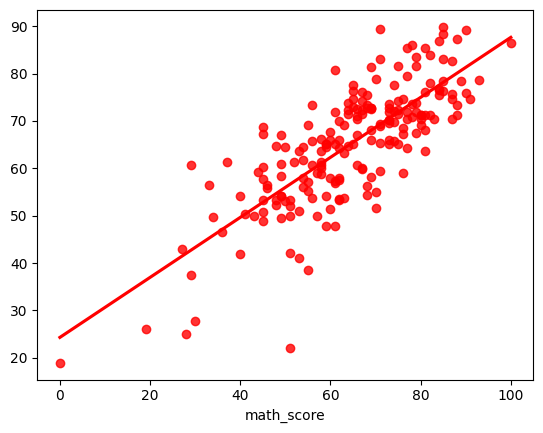

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

Difference between the actual value and the predicted value

In [26]:
pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred, 'Diff': y_test-y_pred})
pred_df

,Actual,Predicted,Diff
521,91,74.631496,16.368504
737,53,63.609891,-10.609891
740,80,70.367917,9.632083
660,74,69.817012,4.182988
411,84,75.491992,8.508008
...,...,...,...
408,52,61.257017,-9.257017
332,62,53.202379,8.797621
208,74,77.496735,-3.496735
613,65,72.962823,-7.962823
